# Aggregate the snow reanalyses HMASR to monthly time scale and about 5km

- HMASR: [High Mountain Asia UCLA Daily Snow Reanalysis, Version 1](https://nsidc.org/data/HMA_SR_D)

conda env: `phd_v3`

In [1]:
# To reload external files automatically (ex: utils)
%load_ext autoreload
%autoreload 2

import xarray as xr
import pandas as pd
import numpy as np
import calendar as cld
import matplotlib.pyplot as plt
import proplot as plot # New plot library (https://proplot.readthedocs.io/en/latest/)
plot.rc['savefig.dpi'] = 300 # 1200 is too big! #https://proplot.readthedocs.io/en/latest/basics.html#Creating-figures
from scipy import stats
import xesmf as xe # For regridding (https://xesmf.readthedocs.io/en/latest/)

import sys
# sys.path.insert(1, '/home/mlalande/notebooks/utils') # to include my util file in previous directory
sys.path.insert(1, '../utils') # to include my util file in previous directory
import utils as u # my personal functions
u.check_python_version()
# u.check_virtual_memory()

3.8.5 | packaged by conda-forge | (default, Jul 24 2020, 01:25:15) 
[GCC 7.5.0]


- FORCING_POST -> PPT_Post
- SD_POST -> SD_Post
- SWE_SCA_POST -> SWE_Post, SCA_Post

## Create folders

In [46]:
# Create folders
WY_list = ['WY'+str(year)+'_'+str(i).zfill(2) for i, year in enumerate(range(1999, 2017))]
path_out = '/mnt/lalandmi/equipes/C2H/HMASR/HMA_SR_M/'

for WY in WY_list:
    print(WY)
    !mkdir {path_out}{WY}

WY1999_00
WY2000_01
WY2001_02
WY2002_03
WY2003_04
WY2004_05
WY2005_06
WY2006_07
WY2007_08
WY2008_09
WY2009_10
WY2010_11
WY2011_12
WY2012_13
WY2013_14
WY2014_15
WY2015_16
WY2016_17


## Aggregate data

In [65]:
for i in u.get_divisors(225):
    print(i)

1
3
5
9
15
25
45
75
225


In [83]:
from os import listdir

WY_list = ['WY'+str(year)+'_'+str(i).zfill(2) for i, year in enumerate(range(1999, 2017))]
# ds_name_list = ['FORCING_POST', 'SD_POST',  'SWE_SCA_POST']
ds_name_list = ['SD_POST',  'SWE_SCA_POST']

for WY in WY_list:
    print(WY)
    path = '/mnt/lalandmi/equipes/C2H/HMASR/HMA_SR_D/'+WY+'/'
    path_out = '/mnt/lalandmi/equipes/C2H/HMASR/HMA_SR_M/'+WY+'/'
    
    for ds_name in ds_name_list:
        print(ds_name)
        list_files = [f for f in listdir(path) if ds_name in f]
        
        for file in list_files:
            ds = xr.open_dataset(path+file)
            if ds_name not in ['FORCING_POST']:
                ds = ds.isel(Stats=0)
            ds = ds.assign_coords(Day=pd.date_range(start=WY[2:6]+'-10-01', periods=ds.Day.size, freq='D'))
            ds = ds.rename({'Longitude': 'lon', 'Latitude': 'lat', 'Day': 'time'}).transpose("time", "lat", "lon")
            
            # Coarsen to about 5 km
            ds = ds.coarsen(lon=9, lat=9).mean()
            
            # Resample to monthly time scale
            ds_monthly = ds.resample(time='1M').mean()
            
            # Change frequency 'D' to 'M' in file name
            file_list = list(file.replace('agg_16', '5km'))
            file_list[7] = 'M'
            file_out = ''.join(file_list)
            
            ds_monthly.to_netcdf(path_out+file_out)

WY1999_00
SD_POST


/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(
/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


SWE_SCA_POST
WY2000_01
SD_POST
SWE_SCA_POST
WY2001_02
SD_POST
SWE_SCA_POST
WY2002_03
SD_POST
SWE_SCA_POST
WY2003_04
SD_POST
SWE_SCA_POST
WY2004_05
SD_POST
SWE_SCA_POST
WY2005_06
SD_POST
SWE_SCA_POST
WY2006_07
SD_POST
SWE_SCA_POST
WY2007_08
SD_POST
SWE_SCA_POST
WY2008_09
SD_POST
SWE_SCA_POST
WY2009_10
SD_POST
SWE_SCA_POST
WY2010_11
SD_POST
SWE_SCA_POST
WY2011_12
SD_POST
SWE_SCA_POST
WY2012_13
SD_POST
SWE_SCA_POST
WY2013_14
SD_POST
SWE_SCA_POST
WY2014_15
SD_POST
SWE_SCA_POST
WY2015_16
SD_POST
SWE_SCA_POST
WY2016_17
SD_POST
SWE_SCA_POST


### Old version for testing one by one

In [2]:
# WY = 'WY1999_00'
WY = 'WY2001_02'

In [3]:
path = '/mnt/lalandmi/equipes/C2H/HMASR/HMA_SR_D/'+WY+'/'
path_out = '/mnt/lalandmi/equipes/C2H/HMASR/HMA_SR_M/'+WY+'/'

In [4]:
from os import listdir
# list_files = [f for f in listdir(path) if 'SWE_SCA_POST' in f]
list_files = [f for f in listdir(path) if 'SWE_SCA_POST' in f]
list_files[:10]

['HMA_SR_D_v01_N27_0E100_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E66_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E67_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E83_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E84_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E85_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E86_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E87_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E88_0_agg_16_WY2001_02_SWE_SCA_POST.nc',
 'HMA_SR_D_v01_N27_0E89_0_agg_16_WY2001_02_SWE_SCA_POST.nc']

In [11]:
ds = xr.open_dataset(path+list_files[0]).isel(Stats=0)
ds = ds.assign_coords(Day=pd.date_range(start='1999-10-01', periods=ds.Day.size, freq='D'))
ds = ds.rename({'Longitude': 'lon', 'Latitude': 'lat', 'Day': 'time'}).transpose("time", "lat", "lon")
ds

<xarray.Dataset>
Dimensions:   (lat: 225, lon: 225, time: 365)
Coordinates:
  * lat       (lat) float32 27.997778 27.993334 27.98889 ... 27.006739 27.002295
  * lon       (lon) float32 100.00222 100.00667 ... 100.99411 100.99856
  * time      (time) datetime64[ns] 1999-10-01 1999-10-02 ... 2000-09-29
Data variables:
    SWE_Post  (time, lat, lon) float32 ...
    SCA_Post  (time, lat, lon) float32 ...

In [39]:
%%time
mon = ds.resample(time='1M').mean()

/home/lalandmi/miniconda3/envs/phd_v3/lib/python3.8/site-packages/xarray/core/common.py:1123: FutureWarning: 'base' in .resample() and in Grouper() is deprecated.
The new arguments that you should use are 'offset' or 'origin'.

>>> df.resample(freq="3s", base=2)

becomes:

>>> df.resample(freq="3s", offset="2s")

  grouper = pd.Grouper(


CPU times: user 10 s, sys: 159 ms, total: 10.2 s
Wall time: 9.75 s


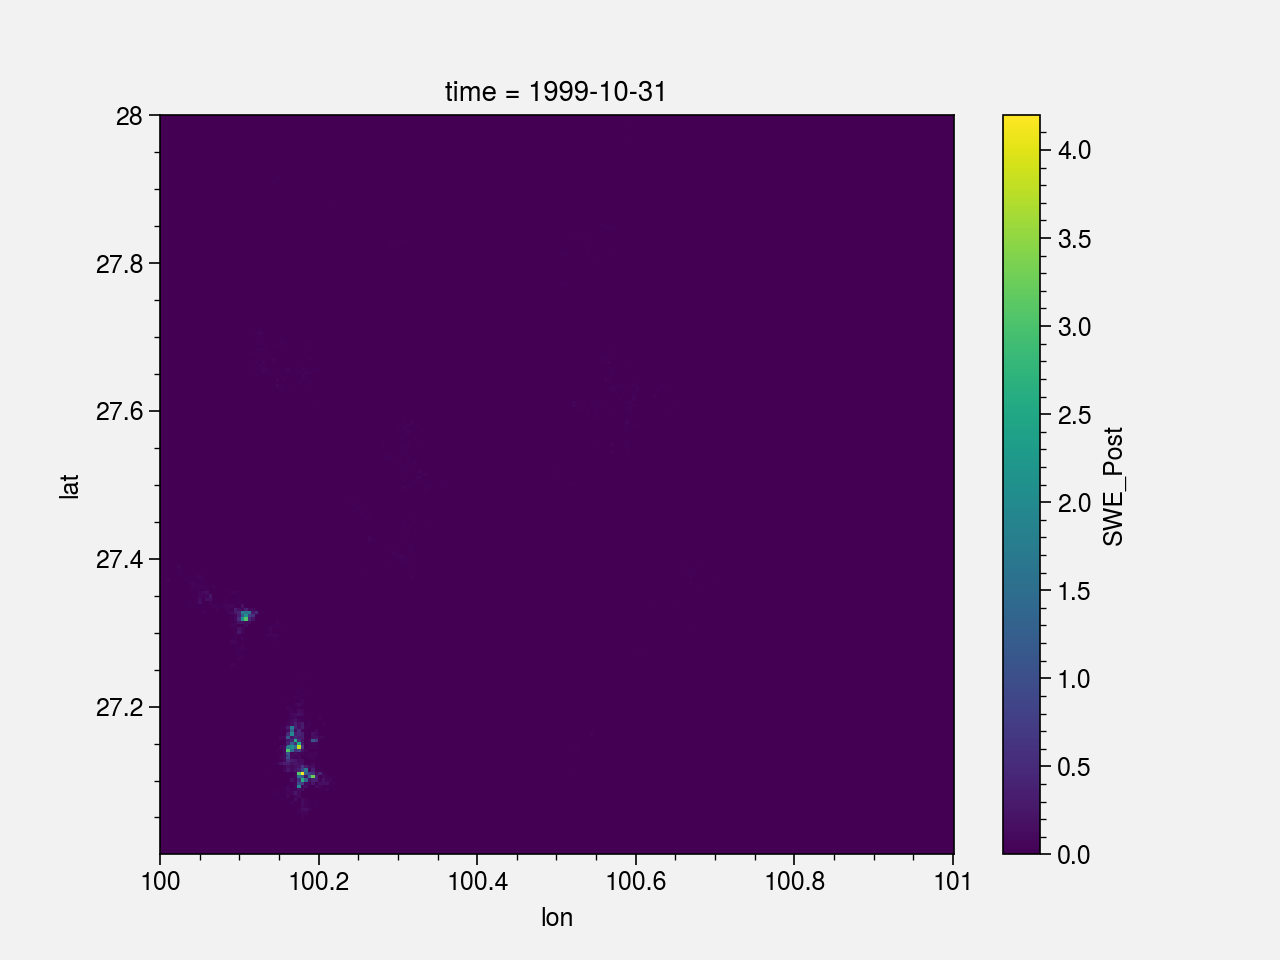

In [24]:
mon.SWE_Post[0].plot()

## Combine files to a single file
Add also dates and rename/reorganize dimensions

In [2]:
# For parallelisation
from dask.distributed import Client
from dask import delayed
from dask import compute
client = Client(n_workers=4, threads_per_worker=3, memory_limit='4GB')
# client = Client()
client

Client Scheduler: tcp://127.0.0.1:33285 Dashboard: http://127.0.0.1:8787/status,Cluster Workers: 4 Cores: 12 Memory: 16.00 GB


In [96]:
client.close()

In [3]:
path = '/mnt/lalandmi/equipes/C2H/HMASR/HMA_SR_M/'
path_out = '/mnt/lalandmi/equipes/C2H/HMASR/HMA_SR_M_combined/'

WY_list = ['WY'+str(year)+'_'+str(i).zfill(2) for i, year in enumerate(range(1999, 2017))]
# ds_name_list = ['FORCING_POST', 'SD_POST',  'SWE_SCA_POST']
ds_name_list = ['SD_POST',  'SWE_SCA_POST']

for WY in WY_list:
    print(WY)
    for ds_name in ds_name_list:
        print(ds_name)
        ds = xr.open_mfdataset(path+WY+'/*'+ds_name+'*', parallel=True)
        ds.to_netcdf(path_out+'HMA_SR_M_v01_all_5km_'+WY+'_'+ds_name+'.nc')

WY1999_00
SD_POST
SWE_SCA_POST
WY2000_01
SD_POST
SWE_SCA_POST
WY2001_02
SD_POST
SWE_SCA_POST
WY2002_03
SD_POST
SWE_SCA_POST
WY2003_04
SD_POST
SWE_SCA_POST
WY2004_05
SD_POST
SWE_SCA_POST
WY2005_06
SD_POST
SWE_SCA_POST
WY2006_07
SD_POST
SWE_SCA_POST
WY2007_08
SD_POST
SWE_SCA_POST
WY2008_09
SD_POST
SWE_SCA_POST
WY2009_10
SD_POST
SWE_SCA_POST
WY2010_11
SD_POST
SWE_SCA_POST
WY2011_12
SD_POST
SWE_SCA_POST
WY2012_13
SD_POST
SWE_SCA_POST
WY2013_14
SD_POST
SWE_SCA_POST
WY2014_15
SD_POST
SWE_SCA_POST
WY2015_16
SD_POST
SWE_SCA_POST
WY2016_17
SD_POST
SWE_SCA_POST


In [26]:
%%time
path = '/mnt/lalandmi/equipes/C2H/HMASR/HMASR_100km/'
# WY = 'WY1999_00'
WY = 'WY2000_01'
ds_name_list = ['FORCING_POST', 'SD_POST',  'SWE_SCA_POST']

ds = xr.open_mfdataset(path+WY+'/*'+ds_name_list[1]+'*', parallel=True)
ds = ds.assign_coords(Day=pd.date_range(start=WY[2:6]+'-10-01', periods=ds.Day.size, freq='D'))
ds = ds.rename({'Longitude': 'lon', 'Latitude': 'lat', 'Day': 'time'}).transpose("time", "lat", "lon")
ds.to_netcdf(path+'HMA_SR_D_v01_100km_'+WY+'_SD_POST.nc')

CPU times: user 3.27 s, sys: 795 ms, total: 4.07 s
Wall time: 5.94 s


,Array,Chunk
Bytes,1.16 MB,1.46 kB
Shape,"(365, 18, 44)","(365, 1, 1)"
Count,6744 Tasks,792 Chunks
Type,float32,numpy.ndarray


In [27]:
ds.to_netcdf(path+'HMA_SR_D_v01_100km_'+WY+'_SD_POST.nc')

In [28]:
test = xr.open_dataset(path+'HMA_SR_D_v01_100km_'+WY+'_SD_POST.nc')
test

<xarray.Dataset>
Dimensions:  (lat: 18, lon: 44, time: 365)
Coordinates:
  * lat      (lat) float64 27.5 28.5 29.5 30.5 31.5 ... 40.5 41.5 42.5 43.5 44.5
  * lon      (lon) float64 61.5 62.5 63.5 64.5 65.5 ... 101.5 102.5 103.5 104.5
  * time     (time) datetime64[ns] 2000-10-01 2000-10-02 ... 2001-09-30
Data variables:
    SD_Post  (time, lat, lon) float32 ...

In [ ]:
ds.assign_coords(Day=pd.date_range(start='1999-10-01', periods=ds.Day.size, freq='D'))

In [ ]:
ds_test = ds.assign_coords(Day=pd.date_range(start='1999-10-01', periods=ds.Day.size, freq='D'))
swe = ds_test.SWE_Post.rename({'Longitude': 'lon', 'Latitude': 'lat', 'Day': 'time'}).transpose("time", "lat", "lon")
scf = ds_test.SCA_Post.rename({'Longitude': 'lon', 'Latitude': 'lat', 'Day': 'time'}).transpose("time", "lat", "lon")